# PROJET PENDULE

## Introduction

Dans ce mini-projet, nous nous intéressons aux oscillations d'un pendule dans différents cas de figures. Tout d'abord, nous nous plaçons dans l'approximation des petits angles et nous étudions le cas simple à 1 seul degré de liberté avec une force de frottement (terme d'amortissement) de valeur variable; puis nous ajoutons une force d'excitation qui possède sa propre pulsation, **force d'intensité variable**  ; et enfin nous étudions le cas sans faire l'approximation des petits angles, qui conduit à un mouvement chaotique.

## I. Pendule simple amorti

Considérons le cas d'un pendule simple uniquement soumis à son poids et à la force de tension du fil. Son équation de mouvement libre est:

$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$
Dans le cas des petits angles, on peut simplifier :
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

où $\theta$ est l'angle que fait le pendule par rapport à la verticale, $\Omega=\sqrt{{g/l}}$ est la pulsation propre et $q$ est le terme de frottement fluide. On utilisera $\Omega=1$ $\mathrm{rad\cdot s^{-1}}$. 


On résout cette équation linéarisée ($\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0$) avec la méthode RK4 pour différentes valeurs de l'amortissement : $q=1$, $q=2$, $q=5\mathrm{~s^{-1}}$ et on trace l'évolution de $\theta(t)$ dans ces régimes respectivement pseudo-périodique, critique et apériodique.


On prendra comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et un pas de temps $\mathrm{d}t=0.05\mathrm{~s}$ pour $t$ allant de $0$ à $20\mathrm{~s}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# on définit les constantes
start = 0 # en s
end = 20
Omega = 1 # rad.s-1
dt = 0.05

In [3]:
# On initialise les paramètres
theta0 = np.radians(10)
dtheta0 = 0
v_ini = np.array([theta0, dtheta0])
# Ici le tableau v représente la dérivée de θ à l'ordre 1 ET 2

On définit une fonction qui calcule les dérivées de $\theta$ aux ordres 1 et 2 à partir des valeurs de $\theta$ et $\dot{\theta}$ :

In [4]:
def derivee(v, t, omega=Omega):
    theta, dtheta = v
    d2theta = - q * dtheta - omega**2 * theta 
    #dérivée seconde de θ
    return np.array([dtheta, d2theta])

Nous allons utiliser la méthode  de résolution numérique RK4 (méthode de Runge-Kutta d'ordre 4).

In [5]:
def RK4(start, end, step, v_ini, derivee, ordre):
    interval = end - start
    num_points = int(interval / step) + 1
    t = np.linspace(start, end, num_points)

    v = np.empty((ordre, num_points))
    v[:, 0] = v_ini

    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i])
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2)
        d4 = derivee(v[:, i] + step * d3, t[i] + step)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
    return t, v

On résout pour les différentes valeurs du terme d'amortissement :

In [6]:
q = 1
t, v = RK4(start, end, dt, v_ini, derivee, 2)
theta1 = v[0]

In [7]:
q = 2
t, v = RK4(start, end, dt, v_ini, derivee, 2)
theta2 = v[0]

In [8]:
q = 5
t, v = RK4(start, end, dt, v_ini, derivee, 2)
theta5 = v[0]

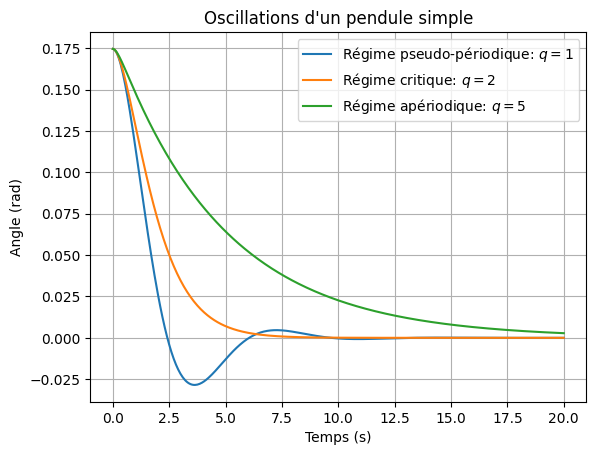

In [9]:
plt.plot(t, theta1, label='Régime pseudo-périodique: $q=1$')
plt.plot(t, theta2, label='Régime critique: $q=2$')
plt.plot(t, theta5, label='Régime apériodique: $q=5$')
plt.xlabel('Temps (s)')
plt.ylabel('Angle (rad)')
plt.title("Oscillations d'un pendule simple")
plt.grid()
plt.legend()
plt.show()

Ce graphique est cohérent vis-à-vis du résultat attendu : pour un terme d'amortissement faible `q=1` le pendule a le temps d'effectuer une oscillation avant d'être complétement amorti et d'être bloqué à l'équilibre. C'est le régime sous-critique pseudo-périodique : le pendule oscille tout en voyant l'amplitude de ses oscillations diminuer progressivement avec le temps à cause de l'amortissement. Pour `q=2`, nous obtenons le régime critique : cas particulier où l'amortissement est juste assez fort pour empêcher les oscillations sans pour autant introduire une décroissance excessivement lente. Enfin, pour`q=5` c'est le cas d'un régime apériodique (ou sur-critique) : l'amortissement est suffisamment élevé pour empêcher les oscillations et le système revient à sa position d'équilibre lentement, sans dépasser cette position. Dans les deux derniers cas, nous obtenons bien graphiquement une décroissance exponentielle.

## II. Force d'excitation

Appliquons désormais une force d'excitation au pendule. Son équation du mouvement s'écrit désormais

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t). $$

Nous allons prendre une force excitatrice d'intensité $F_e=1\mathrm{~rad\cdot s^{-2}}$ et de pulsation $\Omega_e=\frac{2\Omega}{3}$ tout en guardant les mêmes conditions initiales que précédemment.

Comme précédemment, résolvons l'équation avec la méthode RK4. Pour cela, considérons plusieurs cas: le pendule libre (sans amortissement ni force d'excitation) ($q=0$ et $F_e=0$), sous-amorti seulement ($q=1$ et $F_e=0$), et sous-amorti avec excitation ($q=1$ et $F_e=1$).

In [10]:
Omega_e = 2 * Omega / 3
q = 1
Fe = 1

Nous avons une équation du mouvement différente donc nous recalculons la valeur de $\dot{\theta}$ en prenant en compte la force d'excitation :

In [11]:
def derivee_2(v, t):
    theta, dtheta = v
    d2theta = -Omega**2 * theta - q * dtheta + Fe * np.sin(Omega_e * t)
    return np.array([dtheta, d2theta])

In [12]:
q = 0
Fe = 0
t, v = RK4(start, end, dt, v_ini, derivee_2, 2)
theta_q0 = v[0]
dtheta_q0 = v[1]

In [13]:
q = 1
Fe = 0
t, v = RK4(start, end, dt, v_ini, derivee_2, 2)
theta_q1 = v[0]
dtheta_q1 = v[1]

In [14]:
q = 1
Fe = 1
t, v = RK4(start, end, dt, v_ini, derivee_2, 2)
theta_q1_f1 = v[0]
dtheta_q1_f1 = v[1]

On affiche l'amplitude des oscillations en fonction du temps :

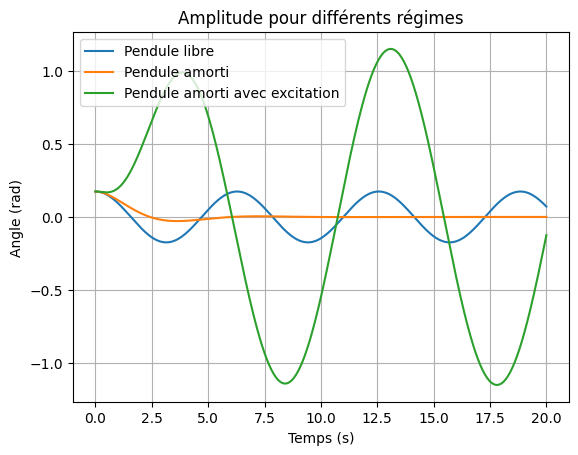

In [15]:
plt.plot(t, theta_q0, label='Pendule libre')
plt.plot(t, theta_q1, label='Pendule amorti')
plt.plot(t, theta_q1_f1, label='Pendule amorti avec excitation')
plt.title('Amplitude pour différents régimes')
plt.xlabel('Temps (s)')
plt.ylabel('Angle (rad)')
plt.grid()
plt.legend()
plt.show()

On distingue 3 courbes différentes correspondantes aux 3 régimes. Pour le pendule libre, la courbe obtenue traduit la conservation de l'énergie en l'absence de frottements; le pendule oscille indéfiniment sans jamais atteindre de position d'équilibre et ni changer d'amplitude. Pour le cas sous-amorti, la courbe obtenue traduit la perte d'énergie du pendule dû au frottement ajouté. Le pendule tend vers sa position d'équilibre à $\theta = 0°$. Enfin, en ajoutant une force d'excitation au cas précédent, on obtient des oscillations plus grandes et la trajectoire ne "converge" pas vers $\theta=0°$. Cette force empêche le pendule d'accéder à sa position d'équilibre (en le gardant toujours en mouvement).

On affiche maintenant la vitesse angulaire en fonction de l'amplitude :

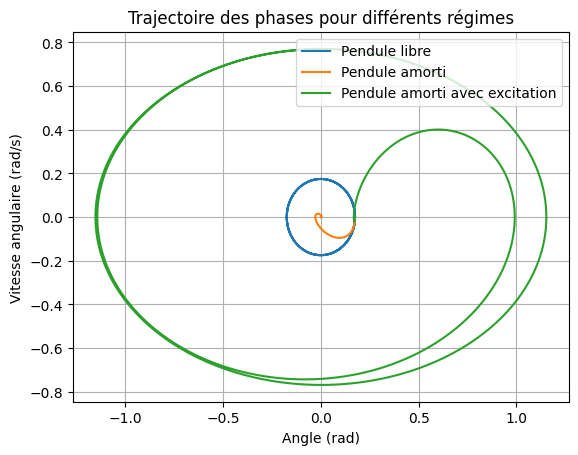

In [16]:
plt.plot(theta_q0, dtheta_q0, label='Pendule libre')
plt.plot(theta_q1, dtheta_q1, label='Pendule amorti')
plt.plot(theta_q1_f1, dtheta_q1_f1, label='Pendule amorti avec excitation')
plt.title('Trajectoire des phases pour différents régimes')
plt.xlabel('Angle (rad)')
plt.ylabel('Vitesse angulaire (rad/s)')
plt.grid()
plt.legend()
plt.show()

On remarque sur ce dernier graphique une diminution de la vitesse angulaire maximale (suivant l'axe des ordonnées) ainsi qu'une diminution de l'amplitude (suivant l'axe des abscisses) dans le cas amorti par rapport au pendule libre. Dans l'ensemble, ces courbes correspondent bien aux trajectoires décrites précdédemment.

## III. Grandes amplitudes : mouvement chaotique

Dans ce dernier cas, on sort de l'approximation des petits angles. L'équation du mouvement du pendule avec la force d'excitation devient :

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\sin\theta=F_e\sin(\Omega_e t) $$

Pour certaines valeurs des paramètres physiques, le comportement du pendule devient chaotique. Afin d'illustrer ce comportement, on se place dans les conditions suivantes: $\theta(t=0)=10\mathrm{~°}$ et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$, $\Omega_e=\frac{2\Omega}{3}$, $q=0.5\mathrm{~s^{-1}}$. Nous étudions un cas de pendule sous-amorti.

Encore une fois, résolvons cette équation avec la méthode RK4 en faisant varier l'amplitude de la force d'excitation: $F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$. Afin d'observer au mieux le comportement chaotique, on prend un intervalle de temps entre $[0s, 100s]$ 

In [17]:
end_2 = 100
q = 0.5

In [18]:
def derivee_3(v, t):
    theta, dtheta = v
    d2theta = -Omega**2 * np.sin(theta) - q * dtheta + Fe * np.sin(Omega_e * t)
    return np.array([dtheta, d2theta])

In [19]:
Fe = 1.4
t, v = RK4(start, end_2, dt, v_ini, derivee_3, 2)
theta_f14 = v[0]

In [20]:
Fe = 1.44
t, v = RK4(start, end_2, dt, v_ini, derivee_3, 2)
theta_f144 = v[0]

In [21]:
Fe = 1.465
t, v = RK4(start, end_2, dt, v_ini, derivee_3, 2)
theta_f1465 = v[0]

In [22]:
Fe = 1.5
t, v = RK4(start, end_2, dt, v_ini, derivee_3, 2)
theta_f15 = v[0]

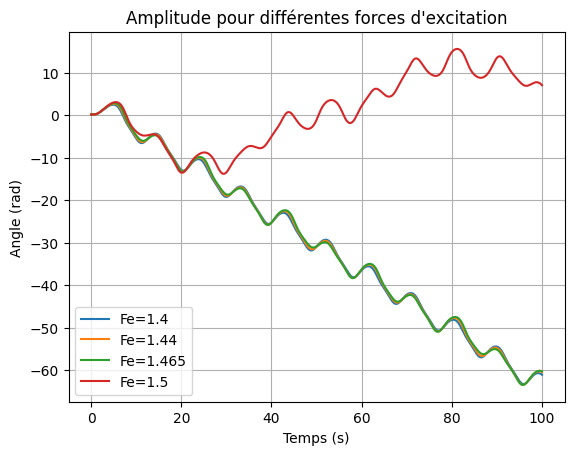

In [23]:
plt.plot(t, theta_f14, label='Fe=1.4')
plt.plot(t, theta_f144, label='Fe=1.44')
plt.plot(t, theta_f1465, label='Fe=1.465')
plt.plot(t, theta_f15, label='Fe=1.5')
plt.title("Amplitude pour différentes forces d'excitation")
plt.xlabel('Temps (s)')
plt.ylabel('Angle (rad)')
plt.grid()
plt.legend()
plt.show()

On remarque ici que pour un même cas de pendule sous-amorti (en prenant le même coefficient de valeur statique et les mêmes conditions initiales), un changement même minime de force d'excitation conduit peut conduire à un mouvement complètement différent. En effet, on observe un mouvement assez similaire pour les 3 premiers cas; malgré de petites différences, la trajectoire du pendule pour les forces d'exitation ($1.4$, $1.14$ et $1.465$) est relativement la même.

Cependant le mouvement devient complètement différent et chaotique lorsque $F_e=1.5$, l'amplitude varie de manière imprévisible et non plus comme une sinusoïde classique. Cette façon d'agir aussi différement en étant très sensible aux conditions initiales est caractéristique des mouvements chaotiques.

Nous pouvons illustrer ce comportement d'une autre manière. En prenant le cas où celui-ci devient chaotique mais en changeant très légèrement l'angle initial, on peut montrer la sensibilité du pendule aux conditions initiales.

Dans le cas $F_e=1.5\mathrm{~rad\cdot s^{-2}}$, calculons l'évolution de $\theta(t)$ pour les conditions initiales $\theta(t=0)=10\mathrm{~°}$ et $\theta(t=0)=9.999\mathrm{~°}$.

In [24]:
end_3 = 200

In [25]:
Fe = 1.5
t, v = RK4(start, end_3, dt, v_ini, derivee_3, 2)
theta_f15 = v[0]

In [26]:
# On calcule la différence
theta0_2 = np.radians(9.999)
v_ini_2 = np.array([theta0_2, dtheta0])

t, v = RK4(start, end_3, dt, v_ini, derivee_3, 2)
theta_ini = v[0]

t, v = RK4(start, end_3, dt, v_ini_2, derivee_3, 2)
theta_ini_2 = v[0]

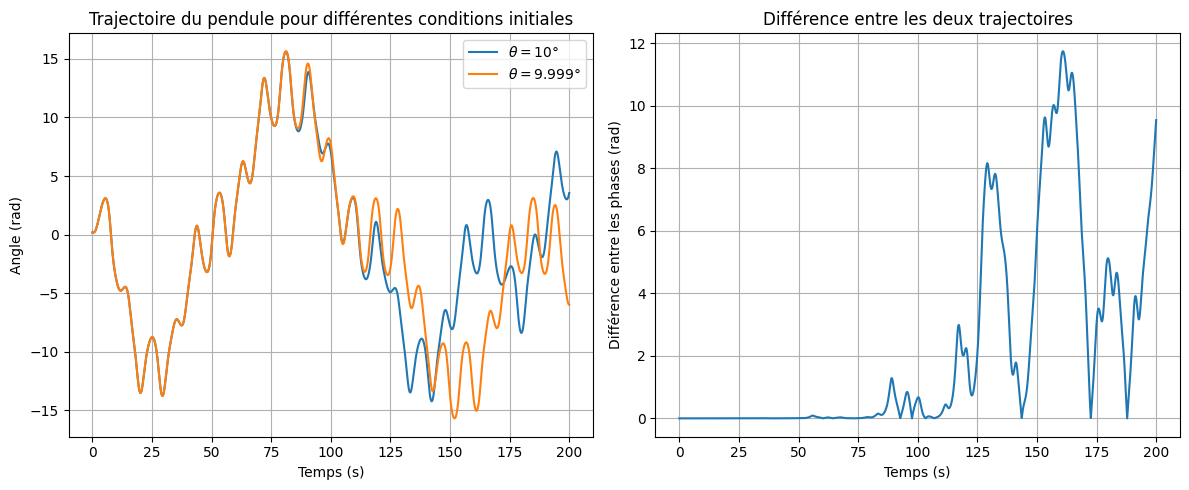

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 ligne, 2 colonnes

ax[0].plot(t, theta_f15, label=r"$\theta=10°$")
ax[0].plot(t, theta_ini_2, label=r'$\theta=9.999°$')
ax[0].set_xlabel('Temps (s)')
ax[0].set_ylabel('Angle (rad)')
ax[0].set_title("Trajectoire du pendule pour différentes conditions initiales")
ax[0].grid()
ax[0].legend()

ax[1].plot(t, np.abs(theta_ini - theta_ini_2))
ax[1].set_title("Différence entre les deux trajectoires")
ax[1].set_xlabel('Temps (s)')
ax[1].set_ylabel('Différence entre les phases (rad)')
ax[1].grid()

plt.tight_layout()
plt.show()

<u> Premier graphe </u>: On constate qu'au début les deux courbes sont quasiment superposées mais au fil du temps, les deux divergent progressivement. Ainsi les deux pendules ont le même mouvement initialement mais se "désynchronisent" et ont leur propre mouvement au bout d'un certain temps (ici 100-125s). Si on traçait les deux courbes sur une plus longue durée, on observerait que les deux pendules effectueraient des mouvements complètement différents. C'est bien la définition d'un mouvement chaotique : pour 2 conditions initiales extrêmement proches, la trajectoire sera complétement différente au bout d'un certain temps.


<u> Deuxième graphe </u>: On observe que la différence d'angle devient forte au bout de $\approx$ 125s, en accord avec nos observations du graphe précédent. Ainsi, malgré un écart initial infime (de $0.001°$), le pendule effectue des trajectoires complétement différentes sur le long terme. On peut afficher cette différence en échelle logarithmique :

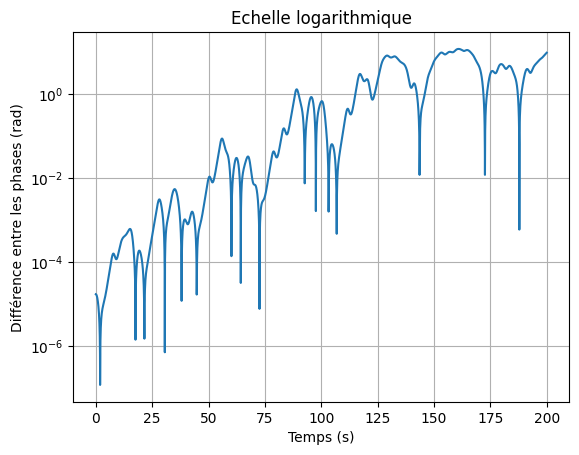

In [28]:
plt.semilogy(t, np.abs(theta_ini - theta_ini_2))
plt.title("Echelle logarithmique")
plt.xlabel('Temps (s)')
plt.ylabel('Différence entre les phases (rad)')
plt.grid()
plt.show()

## Conclusion

Dans ce projet, nous avons modélisé les différents régimes d'oscillations possibles pour un pendule simple. Dans un premier temps, nous avons étudié le cas du pendule simple en régime sous-amorti, critique et apériodique. Nous avons ensuite modélisé une force d'excitation avant d'étudier le cas des grandes amplitudes où le pendule suit un mouvement chaotique. 

Dans ce dernier cas, nous avons pu observer la sensibilité du pendule aux conditions initiales, puisque de très petites variations de ces conditions  peuvent conduire à des trajectoires complètement différentes au bout d'un certain temps.